In [9]:
import pandas as pd
import requests
from tqdm import tqdm

In [10]:
df = pd.read_parquet("../data/request.parquet")

In [11]:
reqs = df.to_dict(orient="records")
reqs

[{'user_id': 'u83153',
  'latitude': 14.068817471971206,
  'longitude': 100.64653564859792,
  'size': 50,
  'sort_dis': 0.0,
  'max_dis': 5000.0},
 {'user_id': 'u45712',
  'latitude': 14.109562142994584,
  'longitude': 100.6986897188348,
  'size': 50,
  'sort_dis': 1.0,
  'max_dis': 5000.0},
 {'user_id': 'u52829',
  'latitude': 13.72738690784919,
  'longitude': 100.83082543338223,
  'size': 50,
  'sort_dis': 1.0,
  'max_dis': 5000.0},
 {'user_id': 'u11570',
  'latitude': 13.921808757777047,
  'longitude': 100.46820296398501,
  'size': 20,
  'sort_dis': 1.0,
  'max_dis': 5000.0},
 {'user_id': 'u99991',
  'latitude': 13.804916705815488,
  'longitude': 100.68274869836898,
  'size': 50,
  'sort_dis': nan,
  'max_dis': 5000.0},
 {'user_id': 'u38657',
  'latitude': 13.755984152670258,
  'longitude': 100.52460461785762,
  'size': 50,
  'sort_dis': nan,
  'max_dis': 10000.0},
 {'user_id': 'u95302',
  'latitude': 14.030551991846853,
  'longitude': 100.79957194321223,
  'size': 20,
  'sort_dis':

In [12]:
from time import time

total_time = 0
time_all = []
for req in tqdm(reqs):
    user_id = req["user_id"]
    req.pop("user_id")

    # if sort_dis is nan then pop it
    if pd.isna(req["sort_dis"]):
        req.pop("sort_dis")
    if pd.isna(req["max_dis"]):
        req.pop("max_dis")

    s = time()
    r = requests.get(f"http://127.0.0.1:80/recommend/{user_id}", params=req)
    time_use = (time() - s) * 1000  # Convert to ms
    total_time += time_use
    time_all.append(time_use)

100%|██████████| 2000/2000 [00:37<00:00, 53.66it/s]


In [13]:
print("{} Requests/s".format(1000 * len(reqs) / total_time))

54.0772182694105 Requests/s


In [14]:
import numpy as np

a = np.array(time_all)
p = np.percentile(a, 90)
p

20.951461791992188

In [36]:
resp = requests.get(
    "http://127.0.0.1:80/recommend/u00099?latitude=13.161217&longitude=100.646612&size=50&max_dis=50000&sort_dis=1.0"
)
resp.json()

{'restaurants': [{'distance': 46929, 'id': 'r3166', 'score': 24.2},
  {'distance': 47370, 'id': 'r8378', 'score': 24.2},
  {'distance': 47621, 'id': 'r4148', 'score': 24.2},
  {'distance': 47988, 'id': 'r2555', 'score': 24.3},
  {'distance': 48083, 'id': 'r8986', 'score': 24.3},
  {'distance': 48122, 'id': 'r0645', 'score': 24.4},
  {'distance': 48137, 'id': 'r4937', 'score': 24.4},
  {'distance': 48241, 'id': 'r2067', 'score': 24.4},
  {'distance': 48267, 'id': 'r7405', 'score': 24.4},
  {'distance': 48325, 'id': 'r6172', 'score': 24.4},
  {'distance': 48426, 'id': 'r9940', 'score': 24.5},
  {'distance': 48495, 'id': 'r3463', 'score': 24.6},
  {'distance': 48584, 'id': 'r2183', 'score': 24.6},
  {'distance': 48645, 'id': 'r6401', 'score': 24.6},
  {'distance': 48878, 'id': 'r3609', 'score': 24.7},
  {'distance': 48917, 'id': 'r1067', 'score': 24.7},
  {'distance': 48919, 'id': 'r3079', 'score': 24.7},
  {'distance': 48938, 'id': 'r9894', 'score': 24.7},
  {'distance': 48972, 'id': 'r5

Text(0.5, 1.0, 'Time to response (ms)')

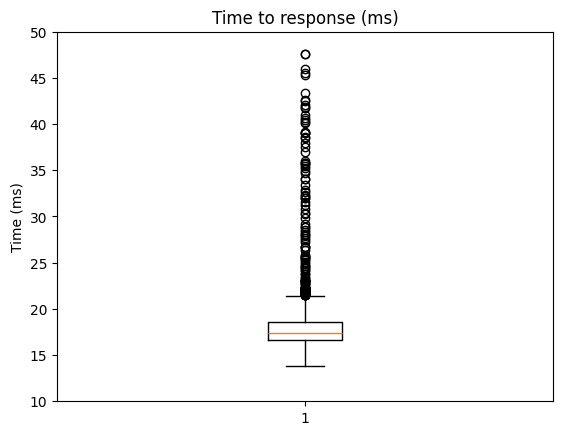

In [49]:
import matplotlib.pyplot as plt

plt.ylim(10, 50)
plt.boxplot(time_all)
plt.ylabel("Time (ms)")
plt.title("Time to response (ms)")